Лабораторная работа 2 Поиск ассоциативных правил

Выполнил: студент группы КЭ-403 В.С. Старишко

ЗАДАНИЕ

Доработайте программу из задания Поиск частых наборов, чтобы она также выполняла поиск ассоциативных правил.



Наборы данных для лабораторной

retail - http://fimi.uantwerpen.be/data/retail.dat

kosarak - http://fimi.uantwerpen.be/data/kosarak.dat

Реализация алгоритма aprioiri - https://github.com/cmapman/Apriori

In [1]:
!wget http://fimi.uantwerpen.be/data/retail.dat

--2022-03-06 06:32:20--  http://fimi.uantwerpen.be/data/retail.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167490 (4.0M)
Saving to: ‘retail.dat’

retail.dat          100%[===================>]   3.97M  5.69MB/s    in 0.7s    

2022-03-06 06:32:21 (5.69 MB/s) - ‘retail.dat’ saved [4167490/4167490]



In [2]:
!wget http://fimi.uantwerpen.be/data/kosarak.dat

--2022-03-06 06:32:22--  http://fimi.uantwerpen.be/data/kosarak.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32029467 (31M)
Saving to: ‘kosarak.dat’

kosarak.dat         100%[===================>]  30.54M  20.0MB/s    in 1.5s    

2022-03-06 06:32:23 (20.0 MB/s) - ‘kosarak.dat’ saved [32029467/32029467]



In [3]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=fb602388e9aee549983328920fb7aaac839fd4332bf4d76e026f8eb11b922e21
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


Импорт библиотек

In [4]:
import numpy as np
from apyori import apriori
import pandas as pd
import seaborn as sns
import timeit
import time


Считываем построчно данные из наборов

In [5]:
retailTransactions = [i.strip().split() for i in open("retail.dat").readlines()]

In [6]:
kosarakTransactions = [i.strip().split() for i in open("kosarak.dat").readlines()]

In [7]:
print(retailTransactions[0])
print(kosarakTransactions[0])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
['1', '2', '3']


Определим функцию для получения наборов с выводом правил, их поддержкой и уверенностью


In [44]:
def getSets(data:list, minСonfidence:int, sort:int=0, printFlag:int=0) -> list:
    num = 0
    rules = list(apriori(data, min_support=0.05,min_confidence=minСonfidence, min_lift = 1))
    if sort:
      rules = sorted(rules, key=lambda a:a[2][0][2],  reverse=True)
    for item in rules:
      num+=1
      if printFlag:
        items = [x for x in item[0]]
        print(f'Base rule: {items}')
        items = [x for x in item[2][0][0]]
        print(f'Base item: {items}')
        items = [x for x in item[2][0][1]]
        print(f'additional item: {items}')
        print(f'Support: {item[1]}')
        print(f'Confidence : {item[2][0][2]}')
        print(f'Lift : {item[2][0][3]}')
        print('--------------------------------------------------------------')
    return num 

Протестируем функцию на наших наборах данных

In [45]:
retailTest = getSets(retailTransactions, 0.2, 1, 1)

Base rule: ['39', '38']
Base item: ['38']
additional item: ['39']
Support: 0.1173408044282117
Confidence : 0.663311105411644
Lift : 1.15399770449534
--------------------------------------------------------------
Base rule: ['48', '41']
Base item: ['41']
additional item: ['48']
Support: 0.10228896803611533
Confidence : 0.6034125125460019
Lift : 1.2625620963825945
--------------------------------------------------------------
Base rule: ['39']
Base item: []
additional item: ['39']
Support: 0.5747941289898142
Confidence : 0.5747941289898142
Lift : 1.0
--------------------------------------------------------------
Base rule: ['48', '32']
Base item: ['32']
additional item: ['48']
Support: 0.0911276967400921
Confidence : 0.5297026438979363
Lift : 1.1083337959257116
--------------------------------------------------------------
Base rule: ['48', '38']
Base item: ['38']
additional item: ['48']
Support: 0.09010684875569973
Confidence : 0.5093613747114644
Lift : 1.065772339321517
---------------

In [46]:
kosarakTest = getSets(kosarakTransactions, 0.4, 0, 1)

Base rule: ['3']
Base item: []
additional item: ['3']
Support: 0.4545758493417185
Confidence : 0.4545758493417185
Lift : 1.0
--------------------------------------------------------------
Base rule: ['6']
Base item: []
additional item: ['6']
Support: 0.6074472576823077
Confidence : 0.6074472576823077
Lift : 1.0
--------------------------------------------------------------
Base rule: ['1', '11']
Base item: ['1']
additional item: ['11']
Support: 0.09280991351532623
Confidence : 0.4651734996607973
Lift : 1.264946355763912
--------------------------------------------------------------
Base rule: ['1', '6']
Base item: ['1']
additional item: ['6']
Support: 0.1334472051571613
Confidence : 0.668852077236966
Lift : 1.1010866684771057
--------------------------------------------------------------
Base rule: ['148', '11']
Base item: ['148']
additional item: ['11']
Support: 0.05632210844018497
Confidence : 0.7974457252366923
Lift : 2.168494260299056
-----------------------------------------------

Выведем количество правил

In [47]:
print(retailTest)
print(kosarakTest)

11
22



Проведём эксперименты по зависимости количества наборов правил от значения минимальной уверенности

In [48]:
retailSets= []
kosarakSets = []

for minСonfidence in range(30, 95, 5):
  retailSets.append(getSets(retailTransactions, minСonfidence / 100, printFlag = 0))
  kosarakSets.append(getSets(kosarakTransactions, minСonfidence/ 100, printFlag = 0))

In [49]:
minConfidenceGraph = np.array([i for i in range(30, 95, 5)]) / 100
retailSetsData = pd.DataFrame({'min_confidence':minConfidenceGraph ,'number_sets':retailSets})
kosarakSetsData = pd.DataFrame({'min_confidence':minConfidenceGraph ,'number_sets':kosarakSets})

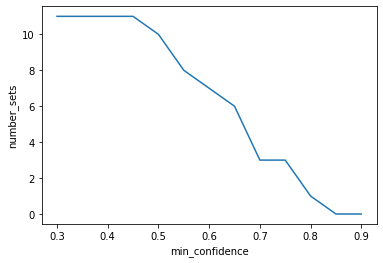

In [50]:
sns.lineplot(data=retailSetsData , x='min_confidence', y='number_sets')

График показывает зависимость количества наборов от значения минимальной уверенности на наборе данных retail

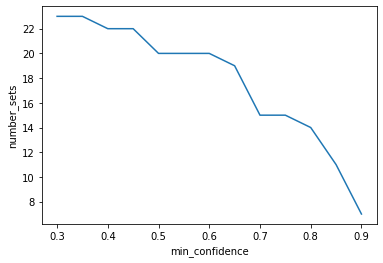

In [51]:
sns.lineplot(data=kosarakSetsData , x='min_confidence', y='number_sets')

График показывает зависимость количества наборов от значения минимальной уверенности на наборе данных kosarak


Исходя из графиков можно сделать вывод, чем меньше значение минимальной уверенности, тем большее количество наборов можно получить


Посчитаем время выполнения функций для разных наборов данных и разных значений минимальной уверенности



In [53]:
def calcTime(name:str) -> list:
  time = []
  for minConfidence in range(30, 95, 5):
    time.append(timeit.timeit(f'apriori({name}, min_confidence={minConfidence/ 100})', globals=
  globals()))
  return time

In [60]:
retailTime = calcTime('retailTransactions')
kosarakTime = calcTime('kosarakTransactions')

In [61]:
retailTimeData = pd.DataFrame({'min_confidence':minConfidenceGraph, 'time':retailTime})
kosarakTimeData = pd.DataFrame({'min_confidence':minConfidenceGraph, 'time':kosarakTime})


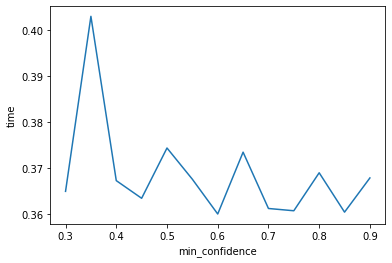

In [62]:
sns.lineplot(data=retailTimeData, x='min_confidence', y='time')

График показывает зависимость времени выполнения от значения минимальной уверенности на наборе данных retail


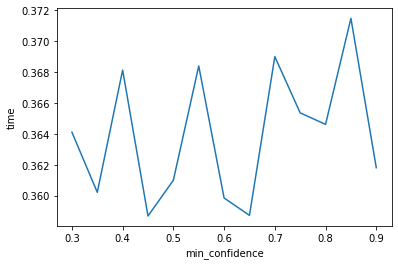

In [63]:
sns.lineplot(data=kosarakTimeData, x='min_confidence', y='time')

График показывает зависимость времени выполнения от значения минимальной уверенност на наборе данных kosarak

Как видно из графиков, время выполнения не зависит от значения минимальной уверенности